<a href="https://colab.research.google.com/github/Anaya666/Anaya666/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Subspaces
import plotly.express as px
import plotly.graph_objects as go

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Subspaces
* We can plot two vectors, v1 and v2, and view the subspace that they create. The subspace is all linear combinations of the two vectors.
* *Note*: The colorbar for the graph is just the z-axis value, it doesn't have any additional meaning.

In [2]:
# define two vectors, we can change these as we like
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

# define different scalars
u_vals = np.linspace(-20, 20)
v_vals = np.linspace(-20, 20)

# create a meshgrid
u, v = np.meshgrid(u_vals, v_vals)

# now get all the values
x = u * v1[0] + v * v2[0]
y = u * v1[1] + v * v2[1]
z = u * v1[2] + v * v2[2]


lim = 50 #limits of axes

# adding the subspace surface to the graph
fig = go.Figure(data = go.Surface(x = x, y = y, z = z, colorscale = 'jet'))
fig.update_layout(
    scene = dict(
        xaxis_range = [-lim, lim],
        yaxis_range = (-lim, lim),
        zaxis_range = (-lim, lim)
    ),
    title = 'Linear Subspace of v1 and v2',
    height = 1000,
    width = 1000
)

# adding the vectors to the graph
fig.add_trace(go.Scatter3d(
  x = [0, v1[0], None, 0, v2[0], None],
  y = [0, v1[1], None, 0, v2[1], None],
  z = [0, v1[2], None, 0, v2[2], None],
  mode = 'lines',
  marker = dict(line = dict(width = 100, color = 'black')),
  line = dict(width = 10, color = 'black') #can change width of the vectors
))

fig

# Advertising Sales Example

* We have a data set of the amount of money spent on TV, radio, and newspaper advertisment.
* *Goal*: Can we predict the amount of sales given the money spent in these three advertisement areas?
* We can use regression as a tool for continous target variable prediction.

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/MMiDS-textbook/MMiDS-textbook.github.io/refs/heads/main/utils/datasets/advertising.csv')
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# Dependent Variable (What we are trying to predict)
TV = data['TV'].to_numpy()

# Independent Variables (Predictors)
sales = data['sales'].to_numpy()
radio = data['radio'].to_numpy()
newspaper = data['newspaper'].to_numpy()

**Question 1:** We can plot each of the graph individually against the sales. Which variable(s) look to be strongly correlated vs weakly correlated? (Answer these questions on your Word Document)

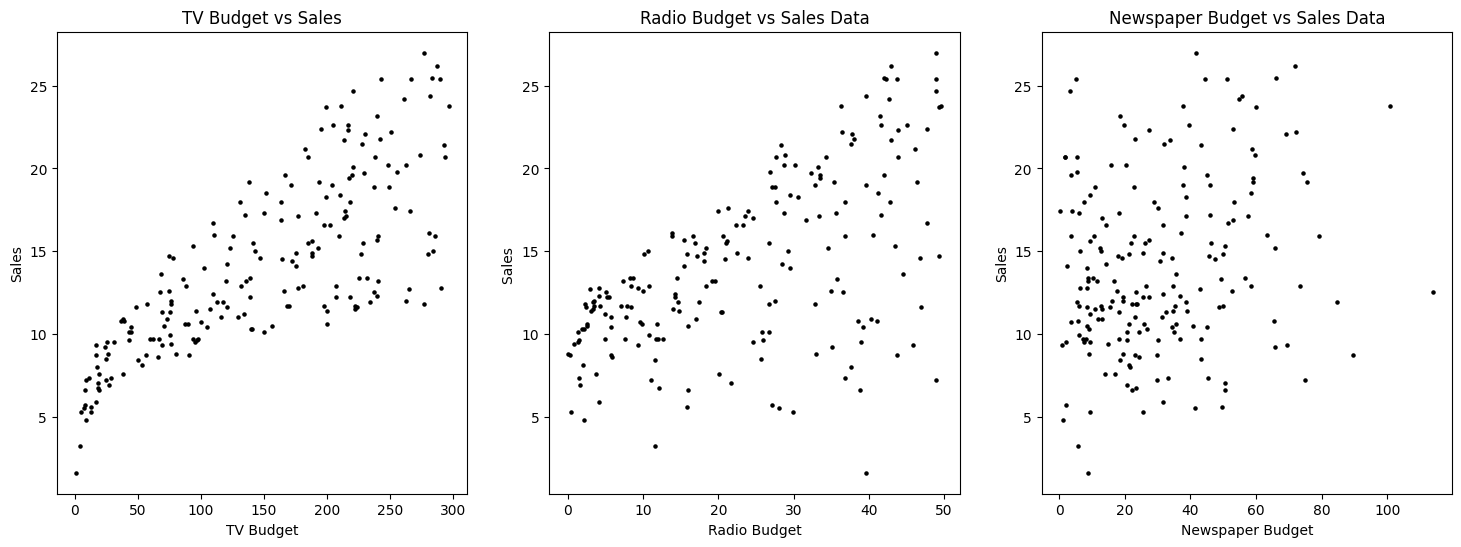

In [5]:
#

fig, ax = plt.subplots(1, 3, figsize = (18, 6))

ax[0].scatter(TV, sales, s=5, c='k')
ax[0].set_xlabel('TV Budget'), ax[0].set_ylabel('Sales')
ax[0].set_title('TV Budget vs Sales')

ax[1].scatter(radio, sales, s=5, c='k')
ax[1].set_xlabel('Radio Budget'), ax[1].set_ylabel('Sales ')
ax[1].set_title('Radio Budget vs Sales Data')

ax[2].scatter(newspaper, sales, s=5, c='k')
ax[2].set_xlabel('Newspaper Budget'), ax[2].set_ylabel('Sales')
ax[2].set_title('Newspaper Budget vs Sales Data')

fig.show()

As you can see - the more money spent on TV, the more sales increase, and similarly, the more money spent on radio advertising, the more sales increase - thus, assuming tv and radio are independent variables, we would expect to see sales increasing as more money is spent on both radio and TV.

In [ ]:
# Load data as a pandas dataframe
data = pd.read_csv('https://raw.githubusercontent.com/MMiDS-textbook/MMiDS-textbook.github.io/refs/heads/main/utils/datasets/advertising.csv')

# select TV and Radio
X = data[['TV', 'radio']]
y = data['sales']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Extract model coefficients and intercept
coefs = model.coef_
inter = model.intercept_

# Create a meshgrid for TV and radio
tv_vals = np.linspace(data['TV'].min(), data['TV'].max(), 50)
radio_vals = np.linspace(data['radio'].min(), data['radio'].max(), 50)
TV, RADIO = np.meshgrid(tv_vals, radio_vals)

# Compute predicted sales (Z-axis) using the regression equation
SALES = inter + coefs[0] * TV + coefs[1] * RADIO  # Using mean(newspaper) for simplicity

# Plot the hyperplane
fig = go.Figure(data=go.Surface(x=RADIO, y=TV, z=SALES, colorscale='jet', opacity=0.7))

# Update layout with correct axis labels
fig.update_layout(
    scene=dict(
        xaxis_title="Radio",
        yaxis_title="TV",
        zaxis_title="Sales",
        xaxis_range=[data['radio'].min(), data['radio'].max()],
        yaxis_range=[data['TV'].min(), data['TV'].max()],
        zaxis_range=[data['sales'].min(), data['sales'].max()]
    ),
    title="Regression Hyperplane for Sales Prediction",
    height=1000,
    width=1000
)

# Add scatter points (actual data)
fig.add_trace(go.Scatter3d(
    x=data['radio'],
    y=data['TV'],
    z=data['sales'],
    mode='markers',
    marker=dict(size=4, color='black', opacity=1)
))

fig.show()


But what about TV and Newspaper (which did not have a strong of a linear relationship with sales)?

In [ ]:
# Load data
data = pd.read_csv('https://raw.githubusercontent.com/MMiDS-textbook/MMiDS-textbook.github.io/refs/heads/main/utils/datasets/advertising.csv')

X = data[['TV', 'newspaper']]
y = data['sales']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Extract model coefficients and intercept
coefs = model.coef_
inter = model.intercept_

# Create a meshgrid for TV and newspaper
tv_vals = np.linspace(data['TV'].min(), data['TV'].max(), 50)
newspaper_vals = np.linspace(data['newspaper'].min(), data['newspaper'].max(), 50)
TV, NEWSPAPER = np.meshgrid(tv_vals, newspaper_vals)

# Compute predicted sales (Z-axis) using the regression equation
SALES = inter + coefs[0] * TV + coefs[1] * NEWSPAPER  # Using mean(newspaper) for simplicity

# Plot the hyperplane
fig = go.Figure(data=go.Surface(x=NEWSPAPER, y=TV, z=SALES, colorscale='jet', opacity=0.7))

# Update layout with correct axis labels
fig.update_layout(
    scene=dict(
        xaxis_title="Newspaper",
        yaxis_title="TV",
        zaxis_title="Sales",
        xaxis_range=[data['newspaper'].min(), data['newspaper'].max()],
        yaxis_range=[data['TV'].min(), data['TV'].max()],
        zaxis_range=[data['sales'].min(), data['sales'].max()]
    ),
    title="Regression Hyperplane for Sales Prediction",
    height=1000,
    width=1000
)

# Add scatter points (actual data)
fig.add_trace(go.Scatter3d(
    x=data['newspaper'],
    y=data['TV'],
    z=data['sales'],
    mode='markers',
    marker=dict(size=4, color='black', opacity=1)
))

fig.show()


You can see that as tv sales increase but as newspaper sales decrease, sales increase

# K-Nearest Neighbors (KNN)

In the k-nearest neighbors (kNN) algorithm, \(k\) is the number of nearest neighbors that are considered when classifying a new point

In [ ]:
def knnregression(x,y,k,xnew):
    n = len(x)
    closest = np.argsort([np.absolute(x[i]-xnew) for i in range(n)])
    return np.mean(y[closest[0:k]])

**Question 2:** What happens to the line as k increases?

In [ ]:
# isolate TV and sales again
TV = data['TV'].to_numpy()
sales = data['sales'].to_numpy()

# create subgraphs
fig, ax = plt.subplots(3, 3, figsize=(18, 12))

axes_count = -1

# define a dictinoary of 9 colors
colors = ['darkblue', 'darkgreen', 'firebrick', 'c', 'm', 'y', 'darkgrey', 'olive', 'dodgerblue']

# loop over the different k values
for k in range(1, 10):
  # check if it should stay in this row, every third has to go to a new row
  modulo = (k-1) % 3
  if modulo == 0:
    axes_count += 1

  # plot the data
  ax[axes_count, modulo].scatter(TV, sales, s=5, c='k', alpha=0.5)

  # get data to predicto n
  xgrid = np.linspace(TV.min(), TV.max(), num=1000)
  yhat = [knnregression(TV,sales,k,xnew) for xnew in xgrid]

  # plot the knn line
  ax[axes_count, modulo].plot(xgrid, yhat, color = colors[k-1],label = rf'$k = {k}$')
  ax[axes_count, modulo].legend()

  # add labels
  ax[axes_count, modulo].set_xlabel('TV Budget'), ax[axes_count, modulo].set_ylabel('Sales')

plt.tight_layout()
plt.show()

**Question 3:** What happens if k = n?

In [ ]:
k = TV.shape[0]
plt.scatter(TV, sales, s=5, c='b', alpha=0.5)
xgrid = np.linspace(TV.min(), TV.max(), num=1000)
yhat = [knnregression(TV,sales,k,xnew) for xnew in xgrid]
plt.plot(xgrid, yhat, color = 'firebrick',label = rf'$k = {k}$')
plt.legend()
plt.xlabel("TV Budget")
plt.ylabel("Sales")
plt.show()

It's just a flat line!

**Quesiton 4:** Why is that the case? What value is the line placed at?

# Ordinary Least Squares Regression (using single variables)


In [ ]:
# we have TV and Sales, we want to use TV to predict sales
# begin by plotting them again
plt.scatter(TV, sales, s=5, c='b', alpha=0.5)
plt.xlabel('TV Budget')
plt.ylabel('Sales')
plt.show()

In [ ]:
# now let's create our design matrix, we need one column for TV and a ones column
n = TV.shape[0]

# our design matrix
X = np.column_stack([np.ones(n), TV])

# let's look at the first 5 rows to see how it's constructed
X[:5, :]

**Question 5:** What do we have to do to our X, design matrix before we train our model?

In [ ]:
# we need to standardize
X[:, 1] = (X[:, 1] - np.mean(X[:, 1])) / np.std(X[:, 1])
X[:5, :]

**Question 6:** Why do we have the first column of 1's?

**Question 7:** What are the values in the second column?

The solution to ordinary least squares regression is:

$$\beta = (X^TX)^{-1}X^TY$$

In [ ]:
# Now we can train our model using Ordinary Least Squares

betas = np.linalg.inv(X.T @ X) @ X.T @ sales

print(betas)

**Question 8:** What does the first component of the beta respresents in regards to a line? What about the second component?

In [ ]:
# now we can plot our line on the graph

# create values of TV to plot the line
TV_vals = np.linspace(X[:, 1].min(), X[:, 1].max(), num=1000)
plt.scatter(TV, sales, s=5, c='b', alpha=0.5)
plt.plot((TV_vals * np.std(TV)) + np.mean(TV), betas[0] + betas[1] * TV_vals, 'r')
plt.ylabel('Sales')
plt.xlabel('TV Budget')
plt.title('Ordinary Least Squares Regression w/ Single Variable')
plt.show()

**Question 9:** How can we assess the performance of our line of best fit?

In [ ]:
# Sum of Squared Errors

preds = X @ betas
m1_sse = np.sum((sales - preds)**2)
print(m1_sse)


# Polynomial Regression

*Increase the Complexity by adding Polynomial Terms*

In [ ]:
# now we may want a more complex model with more freedom, what if we add a squared term of TV
# let's add a squared term to the design matrix

# create the design matrix by adding another column to it
X = np.column_stack(
    [
        X,
        X[:, 1]**2
    ]
)

# let's see what X looks like now
X[:5, :]

**Question 10:** With our new design matrix, how many values of betas will we have? In other words, how long will the beta vector be?

In [ ]:
# Using our new design matrix, let's create the new model.

betas = np.linalg.inv(X.T @ X) @ X.T @ sales

print(betas)

In [ ]:
# now let's plot the new model
TV_vals = np.linspace(X[:, 1].min(), X[:, 1].max(), num=1000)
plt.scatter(TV, sales, s=5, c='b', alpha=0.5)
plt.plot((TV_vals * np.std(TV)) + np.mean(TV), betas[0] + betas[1] * TV_vals + betas[2] * TV_vals**2, 'r')
plt.ylabel('Sales')
plt.xlabel('TV Budget')
plt.title('Ordinary Least Squares Regression w/ Degree 2')
plt.show()

**Question 11:** How does this model compare to the first model we made? What is the main difference you see?

In [ ]:
# Now, let's see if it performed better on our training data
preds = X @ betas
m2_sse = np.sum((sales - preds)**2)
print(m2_sse)

*Our SSE went down! Increasing the complexity seemed to have increased our predictive power on the training data set. Is this trend going to continue as we increase complexity more? How will the model do on data it hasn't seen before? These are critical questions you'll explore in your Project 2.*

# Multiple Least Squares Regression

Next, let's try multiple OLS. This will include more values from the data set than just TV. Creating the design matrix follows the same idea as what we did for increasing the degree. Each column will represent a new variable we've added to the model.

In [ ]:
# remember our data?
data.head(2)

In [ ]:
# let's send it to numpy to start with our design matrix
data_np = data[[
    'TV', 'radio', 'newspaper'
]].to_numpy()

# let's normalize our data
data_np = (data_np - np.mean(data_np, axis = 0)) / np.std(data_np, axis = 0)

# add the column of ones to get our design matrix
X = np.column_stack(
    [
        np.ones(n),
        data_np
    ]
)

# our new design matrix
X[:5, :]

In [ ]:
# Now train the model using OLS and calculate the SSE
betas = np.linalg.inv(X.T @ X) @ X.T @ sales

preds = X @ betas
m3_sse = np.sum((sales - preds)**2)
print(m3_sse)

**Question 12:** What happened to our SSE after using all variabels available (TV, newspaper, and radio) to predict sales?

Note, we cannot plot this multi-dimensional space. Instead, we can only plot it from one view. We may keep the other values constant and change only one, seeing how that variable effects the predictions.

# Extra Examples from the Book. Feel free to look at on your own.

In [ ]:
from numpy import linalg as LA
### Necessary Functions
def gramschmidt(A):
    """
    Performs the Gram-Schmidt process on the given matrix A.

    Parameters:
    A (numpy.ndarray): The input matrix of shape (n, m).

    Returns:
    Q (numpy.ndarray): The orthogonal matrix Q of shape (n, m).
    R (numpy.ndarray): The upper triangular matrix R of shape (m, m).
    """

    (n,m) = A.shape
    Q = np.zeros((n,m))
    R = np.zeros((m,m))
    for j in range(m):
        v = np.copy(A[:,j])
        for i in range(j):
            R[i,j] = np.dot(Q[:,i], A[:,j])
            v -= R[i,j]*Q[:,i]
        R[j,j] = LA.norm(v)
        Q[:,j] = v/R[j,j]
    return Q, R

def ls_by_qr(A, b):
    """
    Solves a linear system of equations using QR decomposition.

    Parameters:
    A (numpy.ndarray): The coefficient matrix of the linear system.
    b (numpy.ndarray): The right-hand side vector of the linear system.

    Returns:
    numpy.ndarray: The solution vector x that satisfies Ax = b.
    """
    Q, R = gramschmidt(A)
    return backsubs(R, Q.T @ b)

def backsubs(R, b):
    """
    Perform back substitution to solve the system of linear equations Rx = b.

    Parameters:
    - R (numpy.ndarray): Upper triangular matrix representing the coefficients of the linear equations.
    - b (numpy.ndarray): Column vector representing the constants of the linear equations.

    Returns:
    - x (numpy.ndarray): Column vector representing the solution to the system of linear equations.
    """
    m = b.shape[0]
    x = np.zeros(m)
    for i in reversed(range(m)):
        x[i] = (b[i] - np.dot(R[i, i + 1:m], x[i + 1:m])) / R[i, i]
    return x

In [ ]:
n, b0, b1 = 100, -1, 1
x = np.linspace(0,10,num=n)
y = b0 + b1*x

plt.scatter(x, y, s=3, c='k')
plt.show()

In [ ]:
seed = 535
rng = np.random.default_rng(seed)

y += rng.normal(0,1,n)

plt.scatter(x, y, s=5, c='k')
plt.show()

In [ ]:
A = np.stack((np.ones(n),x),axis=-1)
coeff = ls_by_qr(A,y)
print(coeff)

In [ ]:
plt.scatter(x, y, s=5, c='b', alpha=0.5)
plt.plot(x, coeff[0]+coeff[1]*x, 'r')
plt.show()

In [ ]:
n, b0, b1, b2 = 100, 0, 0, 1
x = np.linspace(0,10,num=n)
y = b0 + b1 * x + b2 * x**2 + 10*rng.normal(0,1,n)

plt.scatter(x, y, s=5, c='k')
plt.show()

In [ ]:
A = np.stack((np.ones(n), x, x**2), axis=-1)
coeff = ls_by_qr(A,y)
print(coeff)

In [ ]:
plt.scatter(x, y, s=5, c='b', alpha=0.5)
plt.plot(x, coeff[0] + coeff[1] * x + coeff[2] * x**2, 'r')
plt.show()

In [ ]:
TV = data['TV'].to_numpy()
sales = data['sales'].to_numpy()
n = np.size(TV)
A = np.stack((np.ones(n),TV),axis=-1)
coeff = ls_by_qr(A,sales)
print(coeff)

In [ ]:
TVgrid = np.linspace(TV.min(), TV.max(), num=100)
plt.scatter(TV, sales, s=5, c='b', alpha=0.5)
plt.plot(TVgrid, coeff[0]+coeff[1]*TVgrid, 'r')
plt.show()

In [ ]:
A = np.stack((np.ones(n), TV, TV**2), axis=-1)
coeff = ls_by_qr(A,sales)
print(coeff)

In [ ]:
plt.scatter(TV, sales, s=5, c='b', alpha=0.5)
plt.plot(TVgrid, coeff[0] + coeff[1] * TVgrid + coeff[2] * TVgrid**2, 'r')
plt.show()

In [ ]:
deg = 20
A = np.stack([TV**i for i in range(deg+1)], axis=-1)
coeff = ls_by_qr(A,sales)
print(coeff)

In [ ]:
saleshat = np.sum([coeff[i] * TVgrid**i for i in range(deg+1)], axis=0)

plt.scatter(TV, sales, s=5, c='b', alpha=0.5)
plt.plot(TVgrid, saleshat, 'r')
plt.show()

# Why Linear Algebra (Vectors and Matrices), Optimization, Dimensionality, and Gradients are necessary
### Answer: they are the backbone of almost all of data science

---
## Mathematical Background of Linear Algebra in Data Science
Linear algebra is a fundamental branch of mathematics that deals with vector spaces, linear mappings, and matrix operations. At its core, it provides the theoretical foundation for handling and manipulating high-dimensional data, which is crucial in many data science applications. Key concepts include vectors, matrices, eigenvalues, eigenvectors, and singular value decomposition (SVD). These elements help represent and solve systems of linear equations, perform transformations, and reduce the dimensionality of datasets.

In data science, matrices are used to store datasets, where each row represents an observation, and each column represents a feature. Operations such as matrix multiplication, inversion, and decomposition allow for efficient computation and data manipulation. Vector spaces and linear transformations help in understanding geometric interpretations of data, enabling effective dimensionality reduction, feature selection, and optimization techniques. Additionally, concepts like orthogonality and eigenvalue decomposition play a key role in many machine learning algorithms and statistical methods.

**[Don't worry about eigenvalues, eigenvectors, and singular value decomposition (SVD) just yet - that will be the focus of a different project]**

---
## Applications of Linear Algebra in Data Science
Linear algebra is widely applied in various domains of data science, from machine learning to signal processing and computer vision. One of its most common uses is in principal component analysis (PCA) **[spoiler - the topic of project #3]**, where eigenvalue decomposition and singular value decomposition are used to reduce the dimensionality of high-dimensional datasets while preserving as much variance as possible. This technique is essential for feature extraction and visualization in exploratory data analysis.

In machine learning, linear algebra is critical for understanding models such as linear regression, where the solution to the normal equations is obtained using matrix operations. It also plays a key role in gradient-based optimization methods, such as those used in neural networks **[spoiler - the topic of project #4]**, where weights are updated using matrix calculus.

---
## Mathematical Background of Linear Regression in Data Science
Linear regression is one of the most fundamental and widely used techniques in statistics and data science for modeling relationships between variables. It assumes a linear relationship between an independent variable (or multiple independent variables) and a dependent variable. Mathematically, simple linear regression is expressed as:

\begin{equation}
𝑦 = \beta_0+\beta_1𝑥+𝜖
\end{equation}

where 𝑦 is the dependent variable, 𝑥is the independent variable, 𝛽0 is the intercept, 𝛽1 is the coefficient (slope), and 𝜖 represents the error term (assumed to be normally distributed).

For multiple linear regression, where multiple predictors influence the outcome, the equation generalizes to:

\begin{equation}
𝑦 = \beta_0 + \beta_1𝑥_1 + \beta_2𝑥_2+ ... + \beta_n𝑥_n+𝜖
\end{equation}

In matrix notation, we will use Ordinary Least Squares (OLS) to find the line of best fit:

\begin{equation}
\beta = (X^T X)^{-1} X^T Y
\end{equation}

where 𝑋 is the matrix of input features, 𝑦 is the target variable, and 𝛽
contains the estimated regression coefficients.


Linear regression is typically solved using the least squares method, which minimizes the sum of squared residuals (differences between actual and predicted values):

\begin{equation}
SSE = \sum_{i=1}^{n} ||y_i - \hat{y}_i||^2
\end{equation}

These formulas leverages linear algebra concepts such as matrix inversion and transposition to efficiently compute the best-fit line. In large datasets, optimization techniques like gradient descent are used instead of direct matrix inversion for computational efficiency.


---
## Last Thoughts

**Mathematical Goal:** minimize the sum of squares equation to find the line/subplane that best fits the data (in whatever dimension your data is in) in order to find the best beta coefficients.

**Applied Goal:** Answer the question "If I increase variable x by 1 unit, y will increase/decrease by __ unit(s)"

**ex.** "If I increase the cost of my product by 1 dollar, I would expect the number of products I sell to decrease by 3"